In [1]:
import numpy as np
import matplotlib.pyplot as plt
from romshake.simulators.gauss import gauss

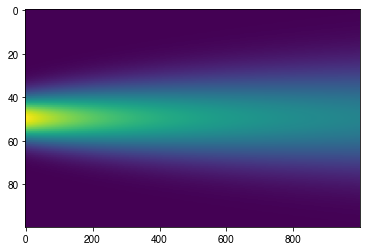

In [2]:
t = np.linspace(0, 1, 1000)
data = np.array([gauss(tval) for tval in t]).T
M, N = data.shape
plt.imshow(data, aspect='auto')
plt.grid(False)
plt.show()

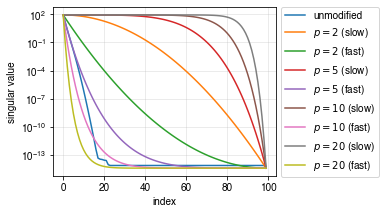

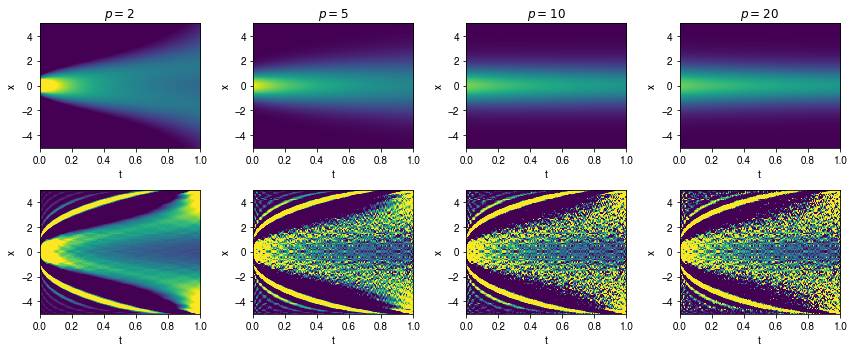

In [3]:
u, s, vh = np.linalg.svd(data, full_matrices=False)
smax, smin = np.log10(s.max()), np.log10(s.min())
x = np.linspace(smin, smax, M)[::-1]
ds = smax - smin

# Make some plots for different pvalues
pvals = [2, 5, 10, 20]

fig1, ax1 = plt.subplots(figsize=(5, 3.1))
ax1.plot(s, label='unmodified')
fig2, axes2 = plt.subplots(nrows=2, ncols=len(pvals), figsize=(12, 5))
for j, p in enumerate(pvals):
    sfast = 10**((1 / ds**(p - 1)) * (x - smin)**p + smin)
    sslow = 10**(-(1 / ds**(p-1)) * (smax - x)**p + smax)
    ax1.plot(sslow, label='$p=%s$ (slow)' % p)
    ax1.plot(sfast, label='$p=%s$ (fast)' % p)
    for i, svals in enumerate([sfast, sslow]):
        ax = axes2[i, j]
        ax.imshow(u @ np.diag(svals) @ vh, aspect='auto', vmin=0, vmax=1, extent=[0, 1, -5, 5])
        ax.set_xlabel('t')
        ax.set_ylabel('x')
        ax.grid(False)
        if i == 0:
            ax.set_title('$p=%s$' % p)
ax1.set_yscale('log')
ax1.set_xlabel('index')
ax1.set_ylabel('singular value')
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig2.tight_layout()
fig1.savefig('sv_curves.pdf')
fig2.savefig('reconstructions.pdf')
plt.show()

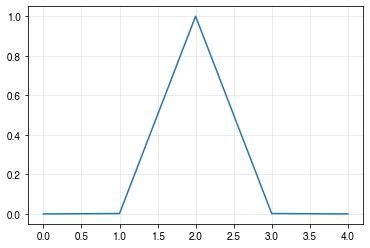

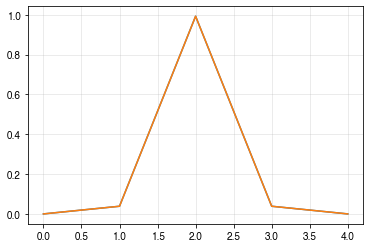

In [6]:
newt = 0.0
newvec = gauss(newt)
plt.plot(newvec)
plt.show()

newdata = np.hstack((data, newvec.reshape(-1, 1)))
u, s, vh = np.linalg.svd(newdata, full_matrices=False)

p = 2
sslow = 10**(-(1 / ds**(p - 1)) * (smax - x)**p + smax)
newdata = u @ np.diag(sslow) @ vh
plt.plot(newdata[:,-1])
plt.plot(newdata[:,0])
plt.show()

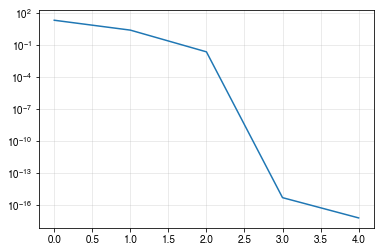

In [8]:
plt.plot(s)
plt.yscale('log')